In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import copy
mpl.rcParams['font.sans-serif'] = ['SimHei']

#### 读取西瓜数据集4.0

In [2]:
dataSet = pd.read_excel(r'D:\a学业信计\a研究生\数据集\西瓜书\watermelon4.0.xlsx')

In [3]:
data = dataSet.values
labels = dataSet.columns.values
indexs = dataSet.index.values

#### 定义k值

In [4]:
k = 3

#### 定义函数

In [5]:
#定义距离计算函数，用Minkowski距离
def MSE(x, y):
    return (np.sum((x - y)**2))**0.5

In [6]:
#根据当前划分结果绘制聚类图象
def show_now_kmeans(C):
    colors = ['b', 'y', 'g', 'p', 'orange', 'c', 'mistyrose', 'gold']
    plt.figure()

    plt.plot(C_cen[:,0], C_cen[:,1], 'rx', markersize = 10)
    for i in range(k):
        plt.plot(np.array(C[i])[:,0], np.array(C[i])[:,1], colors[i] + '.')
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

#### 初始化簇心：随机选取k个样本作为初始均值向量

In [7]:
indexs1 = indexs
np.random.shuffle(indexs1)
C_cen = data[indexs1[0:k]]
C_cen

array([[0.593, 0.042],
       [0.446, 0.459],
       [0.437, 0.211]])

array([[0.593, 0.042],
       [0.446, 0.459],
       [0.437, 0.211]])

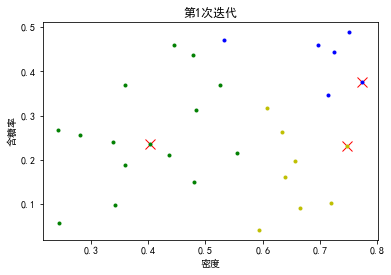

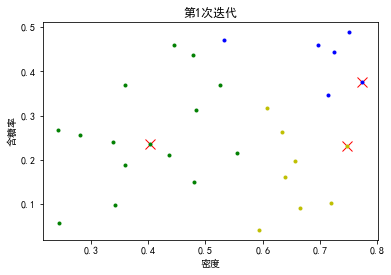

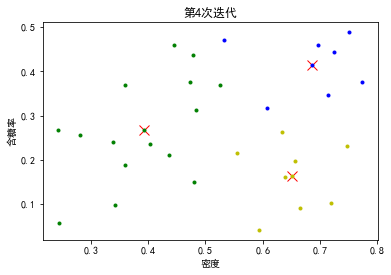

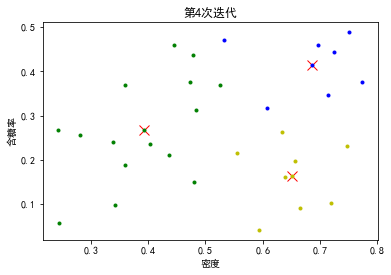

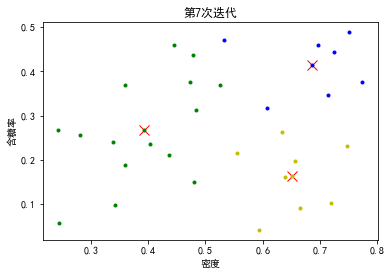

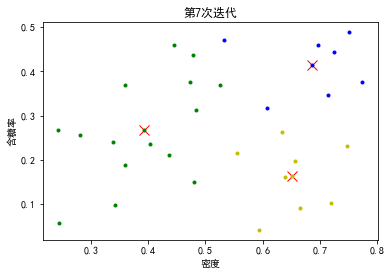

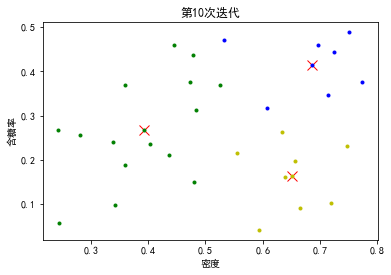

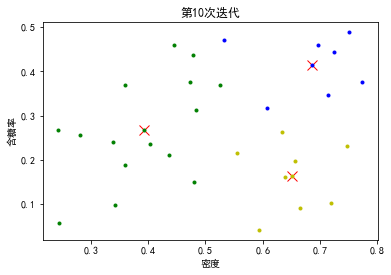

第12次迭代后聚类算法收敛。
第12次迭代后聚类算法收敛。


In [8]:
#初始化簇心，随机选取k个样本作为初始均值向量
indexs1 = indexs
np.random.shuffle(indexs1)
C_cen = data[indexs1[0:k]]
C_cen_save = []#记录每次迭代簇心位置

#定义迭代截止的指标
epsilon = 1e-10
epoch = 0
cen_dist = 10

while cen_dist > epsilon:
    #初始化每个簇，重新分类
    C = []
    for i in range(k):
        C_current = []
        C.append(C_current)
    for i in range(k):
        C[i].append(list(C_cen[i]))
    
    epoch += 1
    #除去中心的数据集
    data_search = [point for point in data if point not in C_cen]
    for i in range(len(data_search)):
        dist_current = []
        for j in range(len(C_cen)):
            dist = MSE(data_search[i], C_cen[j])
            dist_current.append(dist)
        minindex = np.argmin(dist_current)
        C[minindex].append(list(data_search[i]))
    
    #隔三次绘制一次分类结果
    if epoch % 3 == 1:
        show_now_kmeans(C)
        plt.title('第{}次迭代'.format(epoch))
        plt.show()
    
    #更新簇心坐标为平均值
    C_cen_past = copy.deepcopy(C_cen)
    for i in range(k):
        C_cen[i] = list(np.average(C[i], axis = 0))
    #print(C_cen, C_cen_past)
    cen_dist = MSE(C_cen, C_cen_past)
    #print(cen_dist)
    
    if cen_dist < epsilon:
        print('第{}次迭代后聚类算法收敛。'.format(epoch))

### 使用sklearn实现

In [9]:
from sklearn.cluster import KMeans

In [10]:
data[1]

array([0.403, 0.237])

array([0.403, 0.237])

E:\Anaconda1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
E:\Anaconda1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


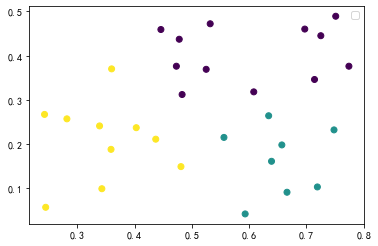

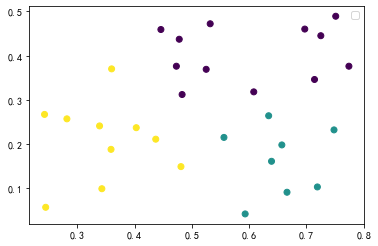

In [11]:
y_pred = KMeans(n_clusters = 3, random_state = 9).fit_predict(data)
plt.figure()
plt.scatter(data[:,0], data[:,1], c = y_pred)
plt.legend()
plt.show()

#### 用Calinski-Harabasz Index评估的聚类分数:

In [23]:
from sklearn import metrics

In [24]:
metrics.calinski_harabasz_score(data, y_pred)

24.35535782529911

24.35535782529911

#### 用MiniBatchKMeans的效果

In [14]:
from sklearn.cluster import MiniBatchKMeans

E:\Anaconda1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
E:\Anaconda1\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


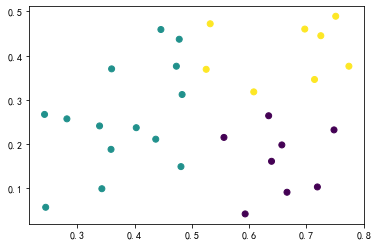

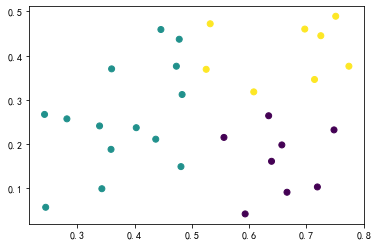

In [20]:
y_pred = MiniBatchKMeans(n_clusters = k, batch_size = 5, random_state=9).fit_predict(data)
#score= metrics.calinski_harabaz_score(data, y_pred)  
plt.scatter(data[:, 0], data[:, 1], c=y_pred)

In [25]:
from sklearn import metrics
metrics.calinski_harabasz_score(data, y_pred)

24.35535782529911

24.35535782529911